**Описание проекта**

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
 
 Требуется разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

## Загрузка данных

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install shap

In [3]:
# Код ревьюера
!pip install -U scikit-learn

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    OrdinalEncoder,
    MinMaxScaler
)
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression
)
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    mean_absolute_error,
    r2_score,
    mean_squared_error,
    roc_auc_score
)
import numpy as np
from scipy.stats import spearmanr
from scipy import stats as st
import phik
from phik.report import plot_correlation_matrix
from phik import phik_matrix

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import (
    RandomizedSearchCV,
    GridSearchCV
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import shap

In [5]:
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
try:
    market_clients = pd.read_csv('D:/Practicum/Pipeline/market_file.csv', sep = ',')
except:

    market_clients = pd.read_csv('/datasets/market_file.csv', sep = ',') 

In [7]:
market_clients.sample(10)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
1117,216465,Прежний уровень,стандарт,да,4.90,4,739,0.17,Мелкая бытовая техника и электроника,5,1,4,4
1285,216633,Прежний уровень,стандарт,нет,2.40,4,192,0.35,Техника для красоты и здоровья,3,3,6,10
1058,216406,Прежний уровень,стандарт,да,4.60,4,713,0.24,Мелкая бытовая техника и электроника,4,4,7,12
637,215985,Прежний уровень,стандарт,да,5.50,5,541,0.17,Мелкая бытовая техника и электроника,4,1,6,5
593,215941,Снизилась,стандарт,да,3.30,5,157,0.13,Домашний текстиль,3,6,5,11
1145,216493,Прежний уровень,стандарт,да,5.30,4,129,0.21,Домашний текстиль,4,5,2,17
439,215787,Прежний уровень,стандарт,да,5.30,4,808,0.23,Косметика и аксесуары,3,0,5,7
927,216275,Прежний уровень,премиум,да,5.10,4,855,0.13,Кухонная посуда,4,4,1,7
831,216179,Прежний уровень,стандарт,да,3.60,4,677,0.18,Домашний текстиль,6,1,6,9
590,215938,Снизилась,стандарт,да,5.20,3,591,0.18,Техника для красоты и здоровья,2,1,4,17


In [8]:
market_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [9]:
market_clients.columns = ['id', 'ClientActivity', 'Service', 'AllowToInform', 'Market_active_6m', 'Market_active_cur_month', 'Duration', 'SalesPurchase', 'PopCategory', 'MeanCategoryVisit', 'UnpaidGoodsQ', 'ServiceError', 'PagesVisit']

In [10]:
try:
    revenue = pd.read_csv('D:/Practicum/Pipeline/market_money.csv', sep = ',', decimal = ',')
except:
    revenue = pd.read_csv('/datasets/market_money.csv', sep = ',', decimal = ',')

In [11]:
revenue.sample(10)

,id,Период,Выручка
12,215352,предыдущий_месяц,5807.5
673,215572,предыдущий_месяц,3879.0
3447,216497,текущий_месяц,6207.6
1877,215973,препредыдущий_месяц,4925.0
3769,216604,текущий_месяц,4840.1
1484,215842,препредыдущий_месяц,4642.0
222,215422,предыдущий_месяц,4995.0
18,215354,предыдущий_месяц,5685.0
2712,216252,предыдущий_месяц,3962.0
2062,216035,препредыдущий_месяц,4763.0


In [12]:
revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       3900 non-null   int64 
 1   Период   3900 non-null   object
 2   Выручка  3900 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.5+ KB


In [13]:
revenue.columns = ['id', 'Period', 'Revenue']

In [14]:
try:
    duration_clients = pd.read_csv('D:/Practicum/Pipeline/market_time.csv', sep=',')
except:
    duration_clients = pd.read_csv('/datasets/market_time.csv', sep=',')

In [15]:
duration_clients.sample(10)

,id,Период,минут
1445,216070,текущий_месяц,21
324,215510,текущий_месяц,14
2492,216594,текущий_месяц,17
1779,216237,текущий_месяц,13
378,215537,текущий_месяц,9
1110,215903,текущий_месяц,6
1039,215867,предыдцщий_месяц,13
432,215564,предыдцщий_месяц,12
563,215629,предыдцщий_месяц,11
981,215838,предыдцщий_месяц,17


In [16]:
duration_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [17]:
duration_clients.columns = ['id', 'Period', 'Minutes']

In [18]:
try:
    income = pd.read_csv('D:/Practicum/Pipeline/money.csv', sep=';', decimal = ',')
except:
    income = pd.read_csv('/datasets/money.csv', sep=';', decimal = ',')

In [19]:
income.sample(10)

,id,Прибыль
119,215467,4.01
550,215898,3.10
314,215662,3.98
1198,216546,4.04
216,215564,2.70
444,215792,3.24
721,216069,4.77
672,216020,4.74
75,215423,3.92
306,215654,2.75


In [20]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [21]:
income.columns = ['id', 'Income']

Данные загружены и соответствуют описанию.

## Предобработка данных

Проверим данные на наличие пропусков. По предыдущим запросам показать info по каждой таблице можно сделать вывод, что явных пропусков в данных нет. Но для наглядности подтвердимся.

In [22]:
df_list = [market_clients, revenue, duration_clients, income]
for df in df_list:
    print(df.isna().sum(),'\n')

id                         0
ClientActivity             0
Service                    0
AllowToInform              0
Market_active_6m           0
Market_active_cur_month    0
Duration                   0
SalesPurchase              0
PopCategory                0
MeanCategoryVisit          0
UnpaidGoodsQ               0
ServiceError               0
PagesVisit                 0
dtype: int64 

id         0
Period     0
Revenue    0
dtype: int64 

id         0
Period     0
Minutes    0
dtype: int64 

id        0
Income    0
dtype: int64 



Проверим данные на наличие явных дубликатов и при необходимости избавимся от них.

In [23]:
for df in df_list:
    print(df.duplicated().sum())

0
0
0
0


Проверим данные на наличие неявных дубликатов в строковых данных и при необходимости избавимся от них.

In [24]:
for col in market_clients.columns:
    if market_clients[col].dtypes == 'object':
        print(market_clients[col].unique())

['Снизилась' 'Прежний уровень']
['премиум' 'стандартт' 'стандарт']
['да' 'нет']
['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


In [25]:
market_clients.loc[market_clients['Service'] == 'стандартт','Service'] = 'стандарт'

In [26]:
market_clients['Service'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [27]:
revenue['Revenue'] = revenue['Revenue'].astype(float)

In [28]:
revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Period   3900 non-null   object 
 2   Revenue  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


*Выводы по предобработке данных:*

1. Явных пропусков не обнаружено
2. Явных дубликатов не обнаружено
3. Найдены неявные дубликаты в таблице с данными по клиентам в столбце Тип сервиса, данные были скорректированы.
4. В таблице с выручкой тип данных столбца "Выручка" не соответстовал цифровому значению. Тип данных был скорректирован. Остальные типы данных соответствуют заявленным.

##  Исследовательский анализ данных

Рассмотрим таблицу с клиентской активностью.

In [29]:
market_clients.sample(5)

,id,ClientActivity,Service,AllowToInform,Market_active_6m,Market_active_cur_month,Duration,SalesPurchase,PopCategory,MeanCategoryVisit,UnpaidGoodsQ,ServiceError,PagesVisit
315,215663,Снизилась,стандарт,да,2.60,4,302,0.28,Товары для детей,1,2,5,4
593,215941,Снизилась,стандарт,да,3.30,5,157,0.13,Домашний текстиль,3,6,5,11
502,215850,Прежний уровень,стандарт,да,5.40,4,267,0.15,Техника для красоты и здоровья,5,1,1,7
1089,216437,Прежний уровень,стандарт,нет,3.30,5,517,0.25,Товары для детей,1,2,1,9
314,215662,Снизилась,стандарт,да,2.90,3,441,0.39,Товары для детей,2,0,1,7


Исследуем категориальные признаки

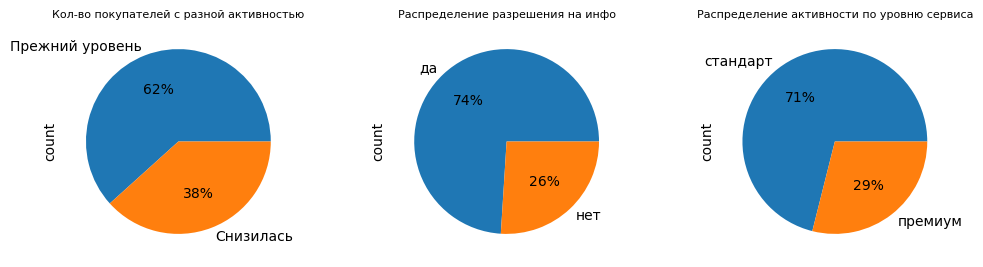

In [30]:
plt.figure(figsize=[12, 3])
plt.subplot(1,3,1)
market_clients['ClientActivity'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Кол-во покупателей с разной активностью', fontsize= 8)
plt.subplot(1,3,2)
market_clients['AllowToInform'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Распределение разрешения на инфо', fontsize= 8)
plt.subplot(1,3,3)
market_clients['Service'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Распределение активности по уровню сервиса', fontsize= 8)
plt.show()

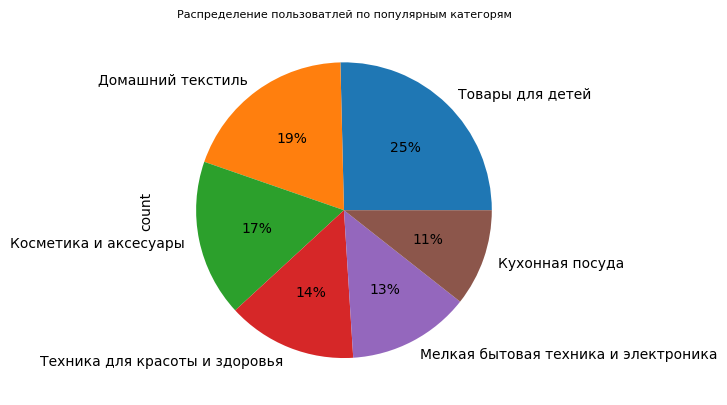

In [31]:
market_clients['PopCategory'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Распределение пользоватлей по популярным категорям', fontsize= 8)
plt.show()

Исследуем количественные признаки

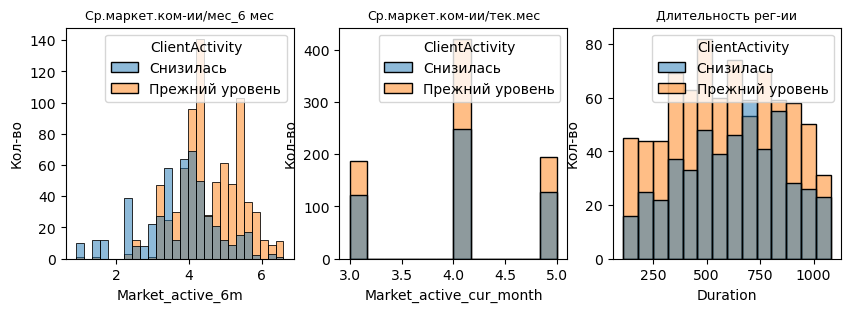

In [32]:
plt.figure(figsize=[10, 3])
plt.subplot(1,3,1)
sns.histplot(data=market_clients, x='Market_active_6m', hue='ClientActivity', label = 'ClientActivity')
plt.ylabel('Кол-во')
plt.title('Ср.маркет.ком-ии/мес_6 мес', fontsize=9)
plt.subplot(1,3,2)
sns.histplot(data=market_clients, x='Market_active_cur_month', hue='ClientActivity', label = 'ClientActivity')
plt.ylabel('Кол-во')
plt.title('Ср.маркет.ком-ии/тек.мес', fontsize=9)
plt.subplot(1,3,3)
sns.histplot(data=market_clients, x='Duration', hue='ClientActivity', label = 'ClientActivity')
plt.ylabel('Кол-во')
plt.title('Длительность рег-ии', fontsize=9)
plt.show()

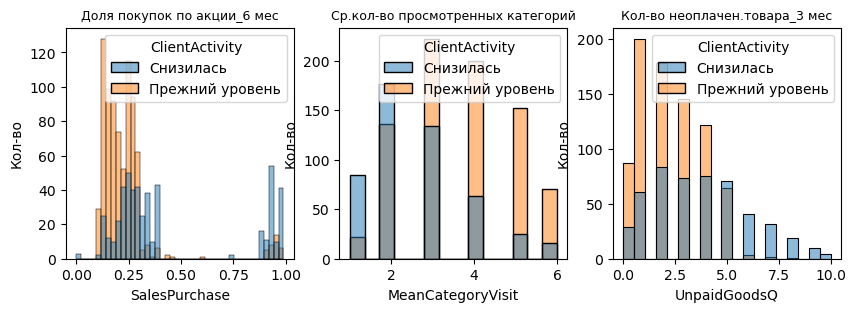

In [33]:
plt.figure(figsize=[10, 3])
plt.subplot(1,3,1)
sns.histplot(data=market_clients, x='SalesPurchase', hue='ClientActivity', label = 'ClientActivity')
plt.ylabel('Кол-во')
plt.title('Доля покупок по акции_6 мес', fontsize=9)
plt.subplot(1,3,2)
sns.histplot(data=market_clients, x='MeanCategoryVisit', hue='ClientActivity', label = 'ClientActivity')
plt.ylabel('Кол-во')
plt.title('Ср.кол-во просмотренных категорий', fontsize=9)
plt.subplot(1,3,3)
sns.histplot(data=market_clients, x='UnpaidGoodsQ', hue='ClientActivity', label = 'ClientActivity')
plt.ylabel('Кол-во')
plt.title('Кол-во неоплачен.товара_3 мес', fontsize=9)
plt.show()

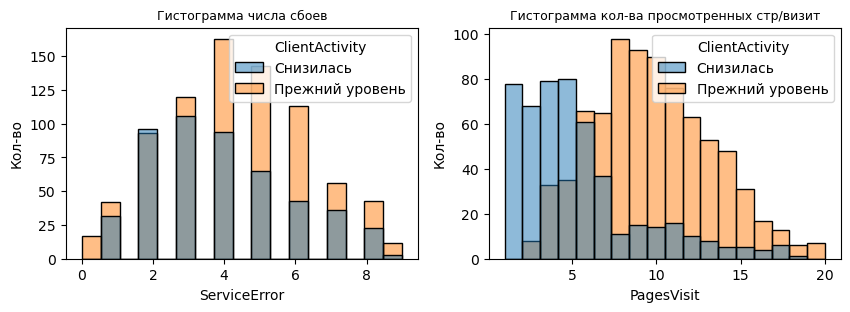

In [34]:
plt.figure(figsize=[10, 3])
plt.subplot(1,2,1)
sns.histplot(data=market_clients, x='ServiceError', hue='ClientActivity', label = 'ClientActivity')
plt.ylabel('Кол-во')
plt.title('Гистограмма числа сбоев', fontsize=9)
plt.subplot(1,2,2)
sns.histplot(data=market_clients, x='PagesVisit', hue='ClientActivity', label = 'ClientActivity')
plt.ylabel('Кол-во')
plt.title('Гистограмма кол-ва просмотренных стр/визит', fontsize=9)
plt.show()

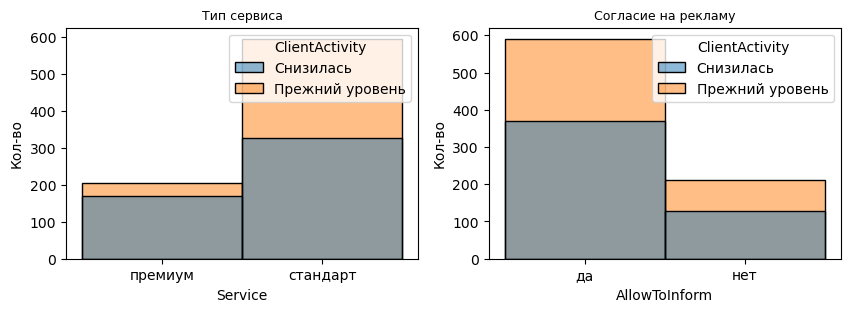

In [35]:
plt.figure(figsize=[10, 3])
plt.subplot(1,2,1)
sns.histplot(data=market_clients, x='Service', hue='ClientActivity', label = 'ClientActivity')
plt.ylabel('Кол-во')
plt.title('Тип сервиса', fontsize=9)
plt.subplot(1,2,2)
sns.histplot(data=market_clients, x='AllowToInform', hue='ClientActivity', label = 'ClientActivity')
plt.ylabel('Кол-во')
plt.title('Согласие на рекламу', fontsize=9)
plt.show()

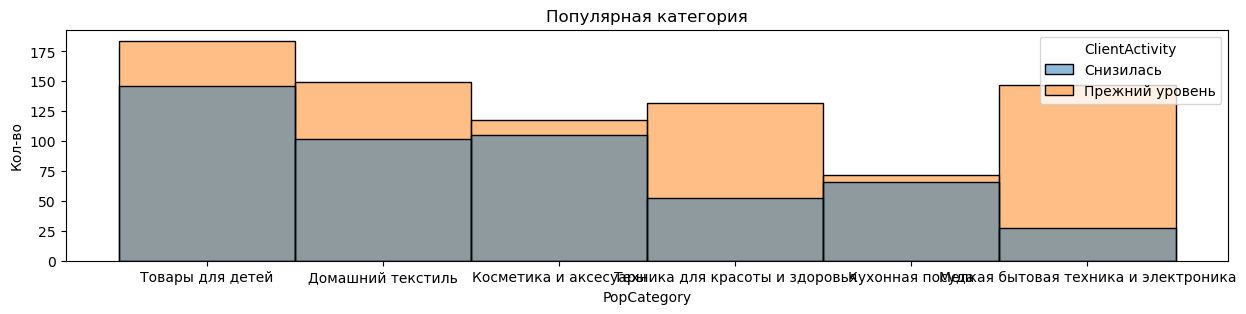

In [36]:
plt.figure(figsize=[15, 3])
sns.histplot(data=market_clients, x='PopCategory', hue='ClientActivity')
plt.ylabel('Кол-во')
plt.title('Популярная категория')
plt.show()

Рассмотрим таблицу с выручкой.

In [37]:
revenue.describe()

,id,Revenue
count,"3,900.00","3,900.00"
mean,"215,997.50","5,025.70"
std,375.33,"1,777.70"
min,"215,348.00",0.00
25%,"215,672.75","4,590.15"
50%,"215,997.50","4,957.50"
75%,"216,322.25","5,363.00"
max,"216,647.00","106,862.20"


Максимальное значение выручки значительно отличается от всех остальных данных. Посмотрим данные не диаграмме размаха.

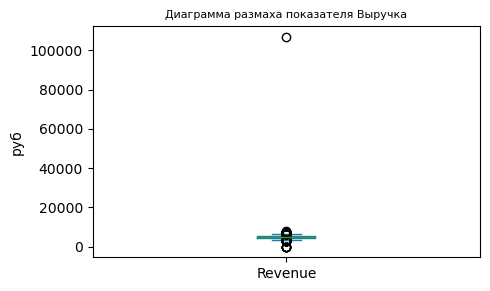

In [38]:
plt.figure(figsize=[5, 3])
revenue['Revenue'].plot.box()
plt.ylabel('руб')
plt.title('Диаграмма размаха показателя Выручка', fontsize = 8)
plt.show()

In [39]:
revenue = revenue.query('Revenue < 20000')
revenue.shape

(3899, 3)

In [40]:
revenue.pivot_table(index='Period', values='Revenue', aggfunc='sum')

,Revenue
Period,
предыдущий_месяц,"6,417,996.50"
препредыдущий_месяц,"6,272,769.00"
текущий_месяц,"6,802,586.90"


In [41]:
rev = revenue.pivot_table(index='id', columns='Period', values='Revenue', aggfunc ='sum').reset_index()

In [42]:
rev.sample(5)

Period,id,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
1021,216369,"3,980.00","4,484.00","3,673.20"
1284,216632,"4,946.50","5,251.00","4,812.60"
829,216177,"4,667.00","5,132.00","4,394.00"
667,216015,"4,466.00","5,492.00","3,706.80"
653,216001,"5,700.50","4,541.00","6,835.40"


In [43]:
rev.columns =['id', 'RevenueT1', 'RevenueT2', 'RevenueT']

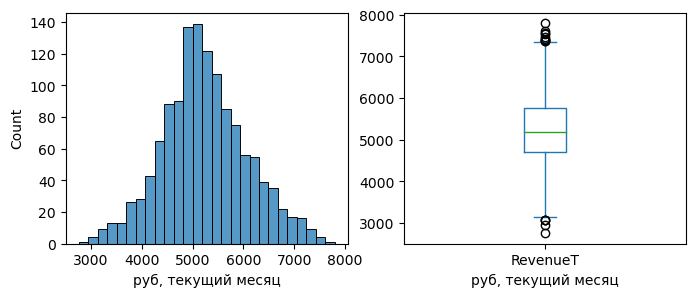

In [44]:
plt.figure(figsize=[8, 3])
plt.subplot(1,2,1)
sns.histplot(data=rev, x='RevenueT')
plt.xlabel('руб, текущий месяц')
plt.subplot(1,2,2)
rev['RevenueT'].plot.box()
plt.xlabel('руб, текущий месяц')
plt.show()

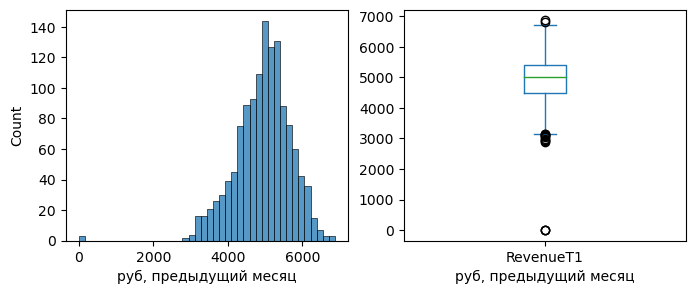

In [45]:
plt.figure(figsize=[8, 3])
plt.subplot(1,2,1)
sns.histplot(data=rev, x='RevenueT1')
plt.xlabel('руб, предыдущий месяц')
plt.subplot(1,2,2)
rev['RevenueT1'].plot.box()
plt.xlabel('руб, предыдущий месяц')
plt.show()

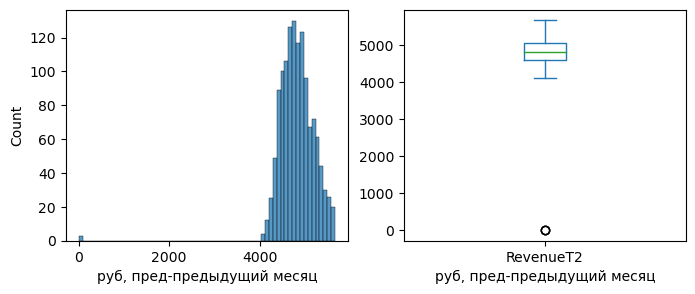

In [46]:
plt.figure(figsize=[8, 3])
plt.subplot(1,2,1)
sns.histplot(data=rev, x='RevenueT2')
plt.xlabel('руб, пред-предыдущий месяц')
plt.subplot(1,2,2)
rev['RevenueT2'].plot.box()
plt.xlabel('руб, пред-предыдущий месяц')
plt.show()

Избавимся от выбросов в выручке с нулевыми значениями.

In [47]:
rev.shape

(1300, 4)

In [48]:
rev[(rev['RevenueT1'] == 0) | (rev['RevenueT2']==0) | (rev['RevenueT']==0)]

,id,RevenueT1,RevenueT2,RevenueT
0,215348,0.00,0.00,"3,293.10"
9,215357,0.00,0.00,"5,986.30"
11,215359,0.00,0.00,"4,735.00"


In [49]:
idtodrop = rev[(rev['RevenueT1'] == 0) | (rev['RevenueT2']==0) | (rev['RevenueT']==0)]['id']

In [50]:
idtodrop

0     215348
9     215357
11    215359
Name: id, dtype: int64

In [51]:
rev = rev[~rev['id'].isin(idtodrop)]

In [52]:
rev.shape

(1297, 4)

In [53]:
rev.isnull().any()

id           False
RevenueT1    False
RevenueT2    False
RevenueT      True
dtype: bool

In [54]:
rev = rev.dropna()

Рассмотрим таблицу со временем, проведенным на сайте.

In [55]:
duration_clients.describe()

,id,Minutes
count,"2,600.00","2,600.00"
mean,"215,997.50",13.34
std,375.35,4.08
min,"215,348.00",4.00
25%,"215,672.75",10.00
50%,"215,997.50",13.00
75%,"216,322.25",16.00
max,"216,647.00",23.00


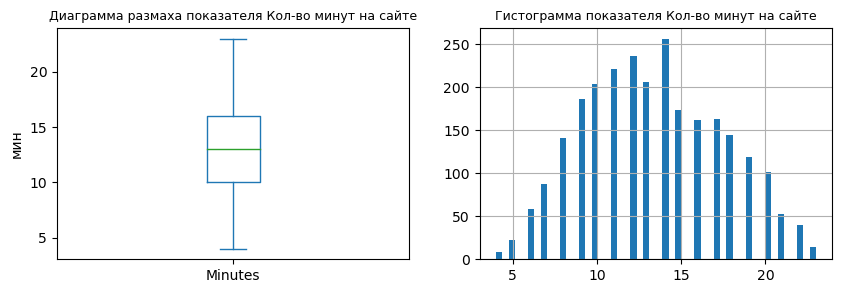

In [56]:
plt.figure(figsize=[10, 3])
plt.subplot(1,2,1)
duration_clients['Minutes'].plot.box()
plt.ylabel('мин')
plt.title('Диаграмма размаха показателя Кол-во минут на сайте', fontsize=9)
plt.subplot(1,2,2)
duration_clients['Minutes'].hist(bins=50)
plt.title('Гистограмма показателя Кол-во минут на сайте', fontsize=9)
plt.show()

Рассмотрим таблицу с доходами по покупателям

In [57]:
income.describe()

,id,Income
count,"1,300.00","1,300.00"
mean,"215,997.50",4.00
std,375.42,1.01
min,"215,348.00",0.86
25%,"215,672.75",3.30
50%,"215,997.50",4.04
75%,"216,322.25",4.67
max,"216,647.00",7.43


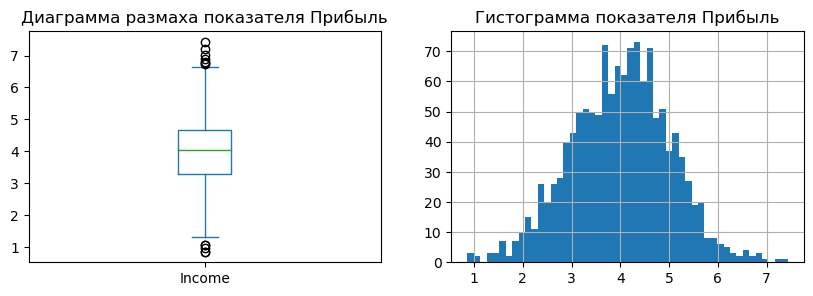

In [58]:
plt.figure(figsize=[10, 3])
plt.subplot(1,2,1)
income['Income'].plot.box()
plt.title('Диаграмма размаха показателя Прибыль')
plt.subplot(1,2,2)
income['Income'].hist(bins=50)
plt.title('Гистограмма показателя Прибыль')
plt.show()

Отберем клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период, и выручка есть за все три месяца. 

In [59]:
market_clients_3m = market_clients[market_clients.id.isin(rev['id'].unique())]

In [60]:
market_clients_3m.sample(5)

,id,ClientActivity,Service,AllowToInform,Market_active_6m,Market_active_cur_month,Duration,SalesPurchase,PopCategory,MeanCategoryVisit,UnpaidGoodsQ,ServiceError,PagesVisit
960,216308,Прежний уровень,премиум,да,4.70,4,974,0.24,Техника для красоты и здоровья,1,2,0,14
217,215565,Снизилась,стандарт,нет,2.40,4,522,0.99,Кухонная посуда,2,5,4,4
1142,216490,Прежний уровень,стандарт,да,4.80,4,832,0.24,Мелкая бытовая техника и электроника,3,1,5,8
210,215558,Снизилась,стандарт,да,4.60,5,867,0.25,Кухонная посуда,2,6,3,5
829,216177,Прежний уровень,стандарт,да,3.50,4,666,0.21,Мелкая бытовая техника и электроника,2,2,2,8


In [61]:
market_clients_3m.shape

(1296, 13)

**Выводы по исследовательскому анализу:**
 

1. В данных по выручке было значение выброс - избавились от него.
2. Доля классов по целевому признаку "Покупательская активность" разная, поэтому нужно использовать стратификацию при разделении выборки на обучающую и тренировочную, чтобы сохранить пропорцию.
3. Распределение количественных признаков в данных разное, но явных выбросов не наблюдается.
4. При отборе клиентов, у которых есть выручка за 3 месяца, нашлись 3 клиента с нулевой выручкой в предыдущий и предпредыдущий месяцы. Эти данные были исключены из выборки.

Категориальные признаки:
1. Клиенты сохраняют уровень покупательской способности, если ср.мес.маркетинговая коммуникация высокая. Чем меньше коммуникация, тем больше клиентов со снижающейся покупательской способностью.
2. Чем больше доля покупок по акции, тем больше клиентов со снижающеся покупательской способностью. Т.Е. это не постоянные клиенты, а те, которые делают покупки, если действует акция.
3. Количество неоплаченных товаров в корзине растет у клиентов со снижающейся покупательской способностью.
4. Активность покупателей преимум сегмента снижается более высокими темпами, чем стандартного сегмента.

##  Объединение таблиц

In [62]:
market_clients_3m['id'].nunique()

1296

In [63]:
market_clients_3m['id'][~market_clients_3m['id'].isin(rev['id'].unique())]

Series([], Name: id, dtype: int64)

Проверили, что все id клиентов в таблице market_clients уникальны. Можно объединять данные.

In [64]:
df_clients = market_clients_3m.merge(rev, on='id', how='left')
df_clients.sample(5)

,id,ClientActivity,Service,AllowToInform,Market_active_6m,Market_active_cur_month,Duration,SalesPurchase,PopCategory,MeanCategoryVisit,UnpaidGoodsQ,ServiceError,PagesVisit,RevenueT1,RevenueT2,RevenueT
859,216211,Прежний уровень,премиум,да,6.30,3,1030,0.13,Домашний текстиль,4,2,5,9,"5,782.00","5,083.00","6,517.80"
1243,216595,Прежний уровень,стандарт,да,4.20,4,753,0.94,Косметика и аксесуары,6,2,3,10,"4,766.50","4,522.00","5,108.40"
947,216299,Прежний уровень,стандарт,да,5.10,4,669,0.16,Товары для детей,4,1,4,6,"5,568.00","5,448.00","5,594.00"
245,215597,Снизилась,стандарт,нет,4.40,5,868,0.40,Домашний текстиль,2,7,8,5,"5,918.00","4,568.00","6,466.60"
1075,216427,Прежний уровень,стандарт,да,3.90,5,513,0.30,Косметика и аксесуары,2,4,3,9,"5,048.50","4,972.00","5,244.80"


In [65]:
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1296 non-null   int64  
 1   ClientActivity           1296 non-null   object 
 2   Service                  1296 non-null   object 
 3   AllowToInform            1296 non-null   object 
 4   Market_active_6m         1296 non-null   float64
 5   Market_active_cur_month  1296 non-null   int64  
 6   Duration                 1296 non-null   int64  
 7   SalesPurchase            1296 non-null   float64
 8   PopCategory              1296 non-null   object 
 9   MeanCategoryVisit        1296 non-null   int64  
 10  UnpaidGoodsQ             1296 non-null   int64  
 11  ServiceError             1296 non-null   int64  
 12  PagesVisit               1296 non-null   int64  
 13  RevenueT1                1296 non-null   float64
 14  RevenueT2               

In [66]:
dur = duration_clients.pivot_table(index='id', columns='Period', values='Minutes', aggfunc ='sum').reset_index()

In [67]:
dur.sample(5)

Period,id,предыдцщий_месяц,текущий_месяц
958,216306,13,7
1083,216431,18,12
672,216020,8,15
305,215653,7,13
581,215929,15,19


In [68]:
dur.columns =['id', 'MinutesT1', 'MinutesT']

In [69]:
dur.sample(5)

,id,MinutesT1,MinutesT
1060,216408,16,22
350,215698,12,10
619,215967,8,22
601,215949,12,18
86,215434,7,7


In [70]:
dur.shape

(1300, 3)

In [71]:
dur['id'].nunique()

1300

In [72]:
df_clients = df_clients.merge(dur, on='id', how='left')
df_clients.sample(5)

,id,ClientActivity,Service,AllowToInform,Market_active_6m,Market_active_cur_month,Duration,SalesPurchase,PopCategory,MeanCategoryVisit,UnpaidGoodsQ,ServiceError,PagesVisit,RevenueT1,RevenueT2,RevenueT,MinutesT1,MinutesT
1160,216512,Прежний уровень,премиум,да,4.20,3,545,0.21,Мелкая бытовая техника и электроника,3,2,3,10,"4,858.00","4,939.00","4,917.80",13,15
120,215472,Снизилась,стандарт,нет,2.40,4,186,0.93,Косметика и аксесуары,3,6,3,4,"5,920.50","4,596.00","6,099.90",11,8
1042,216394,Прежний уровень,стандарт,нет,4.70,3,440,0.12,Мелкая бытовая техника и электроника,4,2,4,10,"4,941.50","5,000.00","5,020.80",12,15
335,215687,Снизилась,стандарт,да,3.90,4,627,0.24,Товары для детей,3,3,7,8,"5,004.50","4,460.00","5,606.40",17,12
346,215698,Снизилась,стандарт,да,3.50,4,685,0.89,Техника для красоты и здоровья,2,9,3,3,"3,441.00","4,429.00","3,520.30",12,10


## Корреляционный анализ

In [73]:
df_clients['ClientActivityCode'] = df_clients['ClientActivity'].apply(lambda x: 0 if x == 'Прежний уровень' else 1)

In [74]:
num_col_names_0 = df_clients.query('ClientActivityCode == 0').select_dtypes(include='number').columns.tolist()

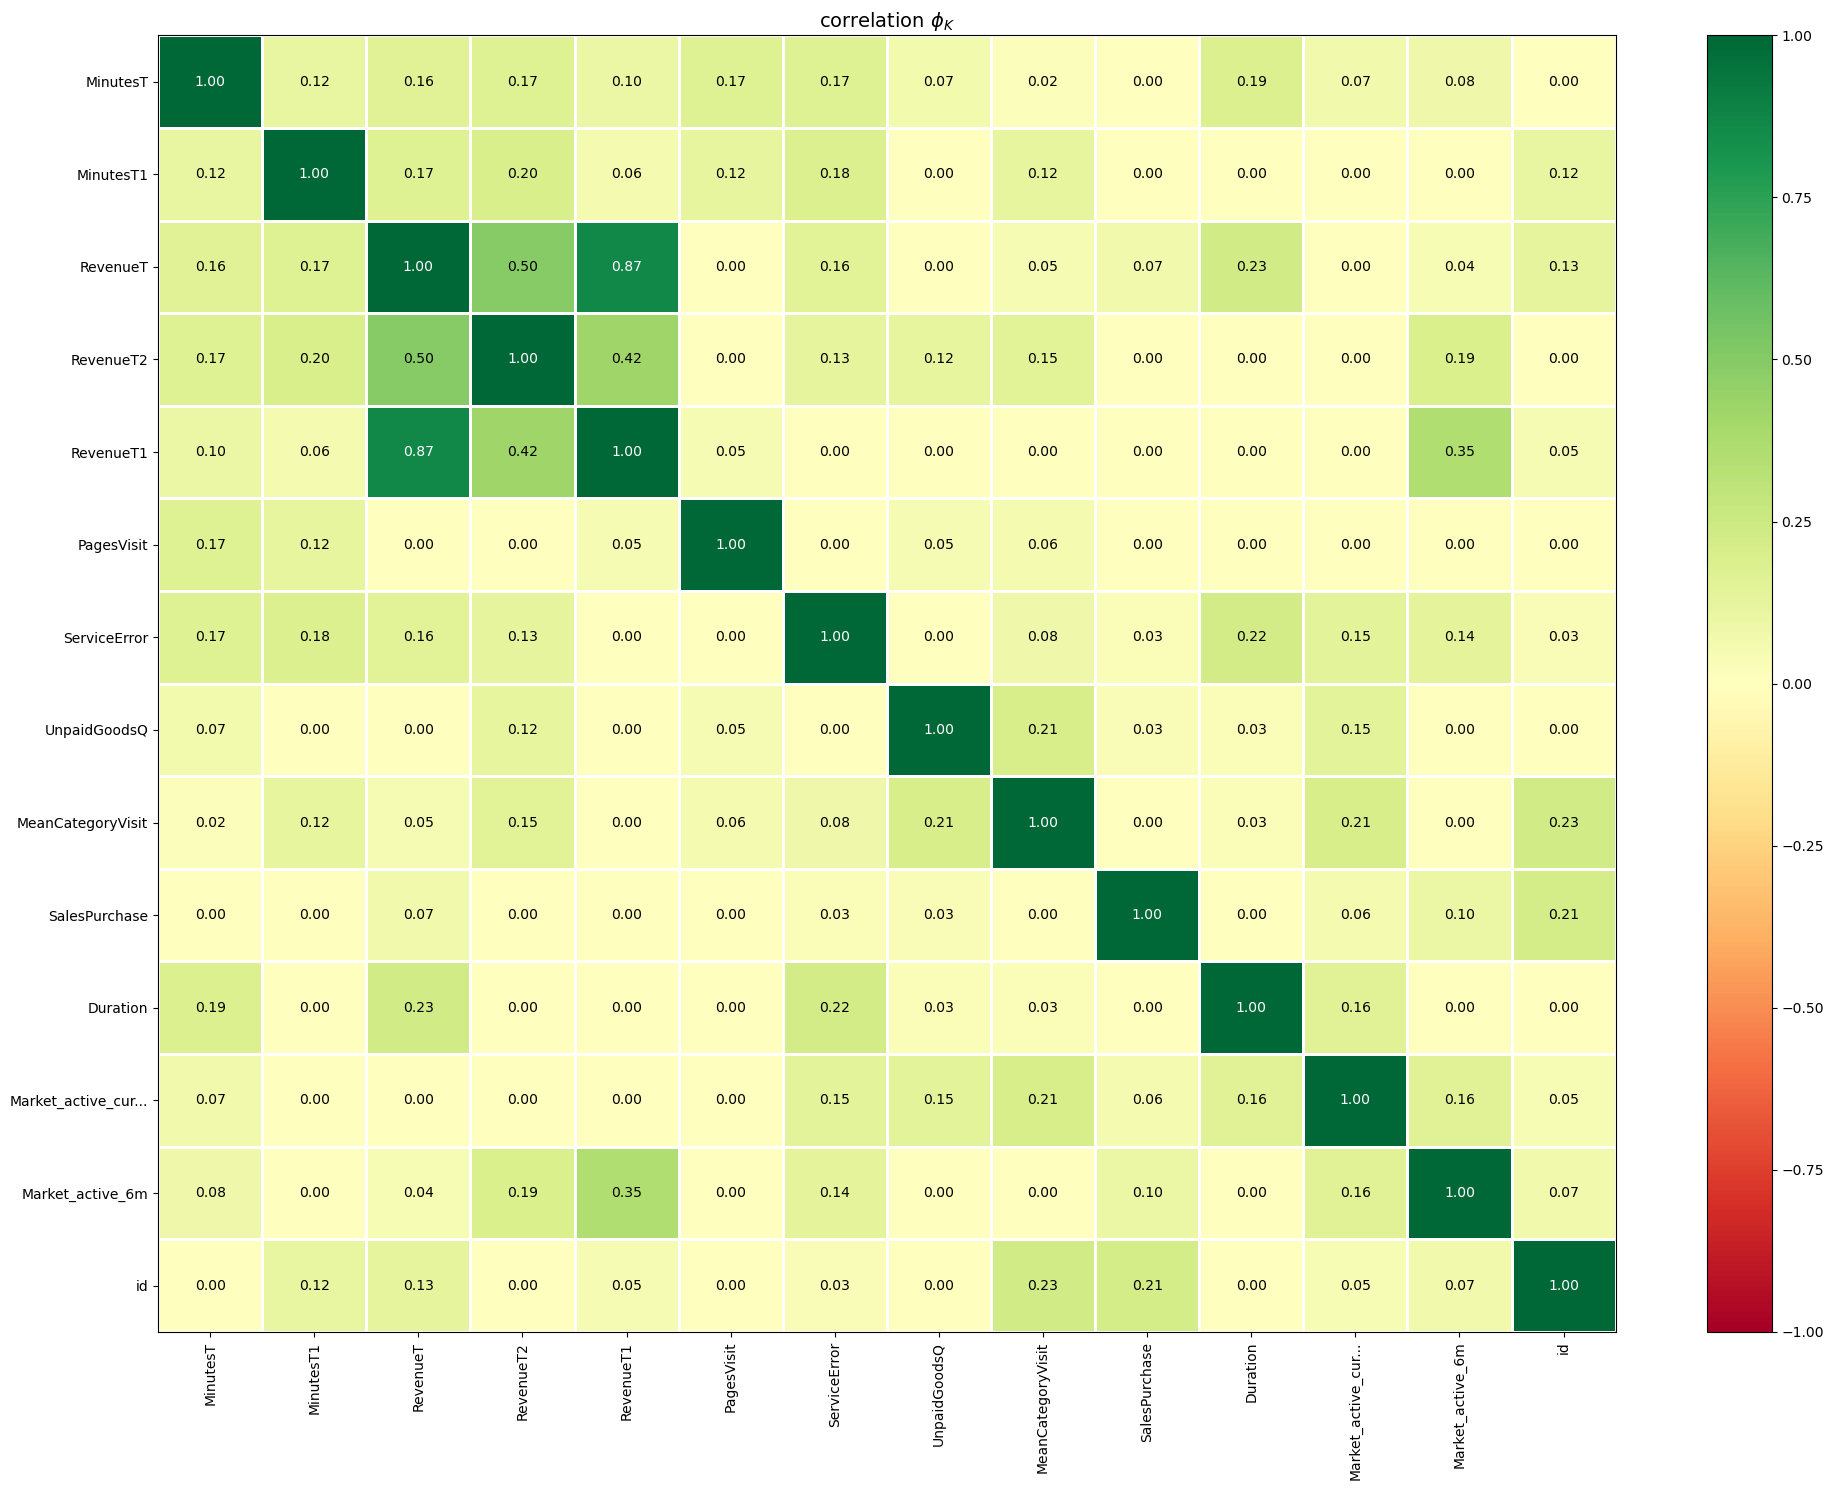

In [75]:
phik_overview = phik_matrix(df_clients.query('ClientActivityCode == 0')[num_col_names_0], interval_cols=num_col_names_0)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    title=r'correlation $\phi_K$',
    figsize=(20, 15)
) 

In [76]:
num_col_names_1 = df_clients.query('ClientActivityCode == 1').select_dtypes(include='number').columns.tolist()

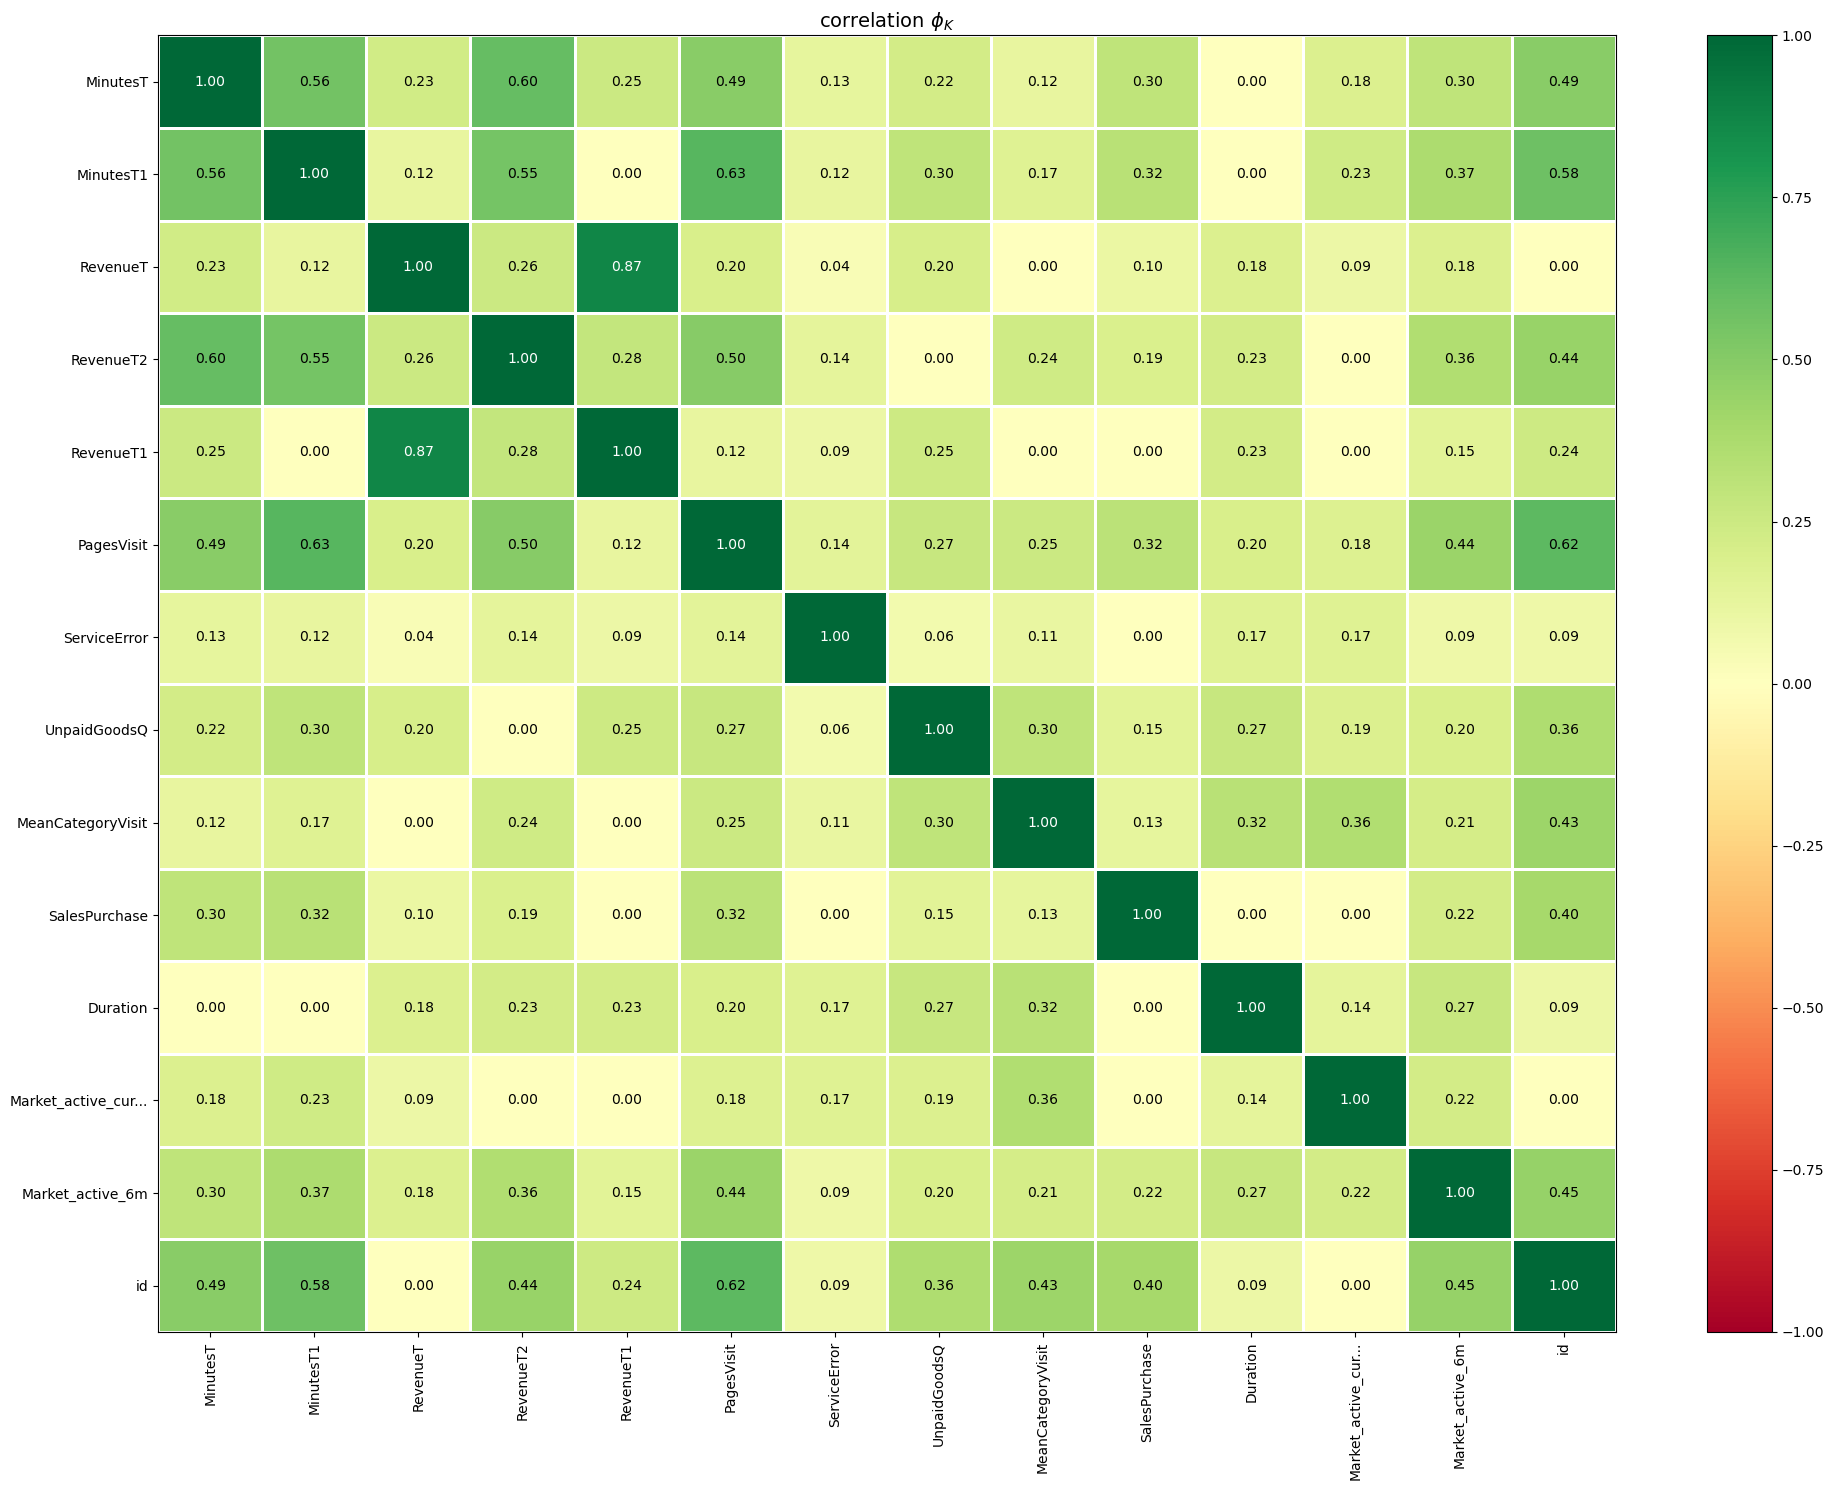

In [77]:
phik_overview = phik_matrix(df_clients.query('ClientActivityCode == 1')[num_col_names_1], interval_cols=num_col_names_1)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    title=r'correlation $\phi_K$',
    figsize=(20, 15)
) 

Построены 2 графика корреляции, первый - для тех клиентов, у которых покупательская активность сохранилась, второй - для тех, у кого снизилась.

На первом графике корреляция признаков с выручкой низкая почти по всем пунктам. Можно отметить небольшую положительную корреляцию выручки с показателем среднемесячного значения маркетинговых коммуникаций за 6 месяцев (0,35 с выручкой 
в предыдущем месяце Т-1).

На втором графике заметна бОльшая корреляция признаков. Отметим следующие:
- видимая корреляция выручки в Т-2 с показателем кол-ва просмотренных страниц за визит (0,49) и с пок-ем ср.маркетинговой активности за 6 мес (0,35)
- корреляция выручки в Т-2 с минутами на сайте в другие периоды есть, но она похожа на случайную.

Можно сделать вывод, что те клиенты, по которым покупательская активность снизилась в текущем периоде, в предыдущие месяцы активно пользовались маркетинговыми компаниями, но со временем компании либо закончились, либо перестали интересовать.

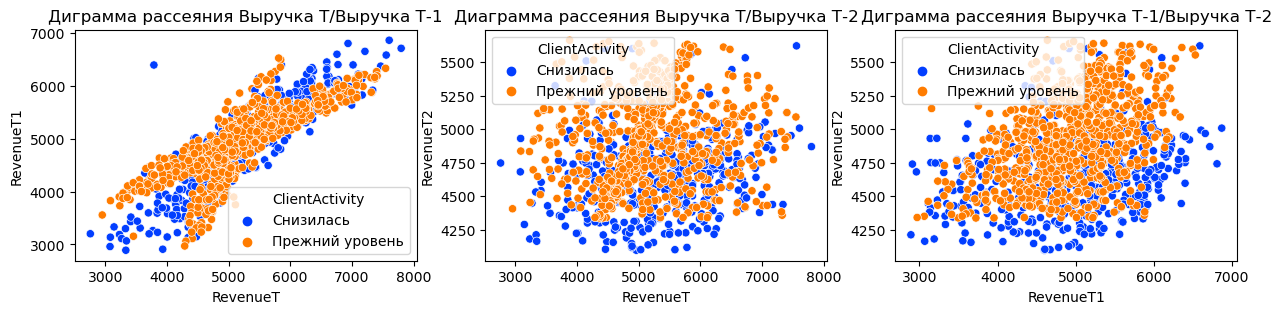

In [78]:
plt.figure(figsize=[15, 3])
plt.subplot(1,3,1)
sns.scatterplot(x = 'RevenueT', y = 'RevenueT1', data = df_clients, palette='bright', hue = 'ClientActivity')
plt.title('Диграмма рассеяния Выручка Т/Выручка Т-1')
plt.subplot(1,3,2)
sns.scatterplot(x = 'RevenueT', y = 'RevenueT2', data = df_clients, palette='bright', hue = 'ClientActivity')
plt.title('Диаграмма рассеяния Выручка Т/Выручка Т-2')
plt.subplot(1,3,3)
sns.scatterplot(x = 'RevenueT1', y = 'RevenueT2', data = df_clients, palette='bright', hue = 'ClientActivity')
plt.title('Диграмма рассеяния Выручка Т-1/Выручка Т-2')
plt.show()

Введем дополнительные признаки и посмотрим на их корреляцию.

In [79]:
df_clients['RevenueT1andRevenueT2'] = df_clients['RevenueT1'] + df_clients['RevenueT2']

In [80]:
df_clients['RevenueT1minusRevenueT2'] = df_clients['RevenueT1'] - df_clients['RevenueT2']

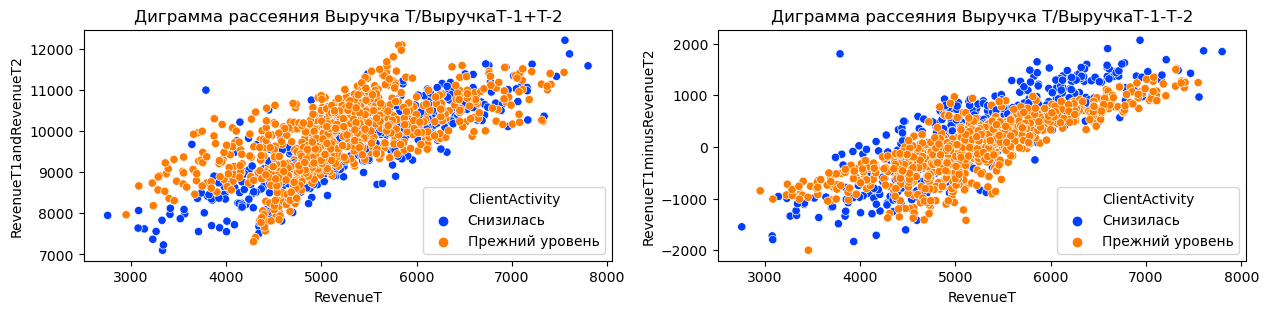

In [81]:
plt.figure(figsize=[15, 3])
plt.subplot(1,2,1)
sns.scatterplot(x = 'RevenueT', y = 'RevenueT1andRevenueT2', data = df_clients, palette='bright', hue = 'ClientActivity')
plt.title('Диграмма рассеяния Выручка Т/ВыручкаТ-1+T-2')
plt.subplot(1,2,2)
sns.scatterplot(x = 'RevenueT', y = 'RevenueT1minusRevenueT2', data = df_clients, palette='bright', hue = 'ClientActivity')
plt.title('Диграмма рассеяния Выручка Т/ВыручкаТ-1-Т-2')
plt.show()

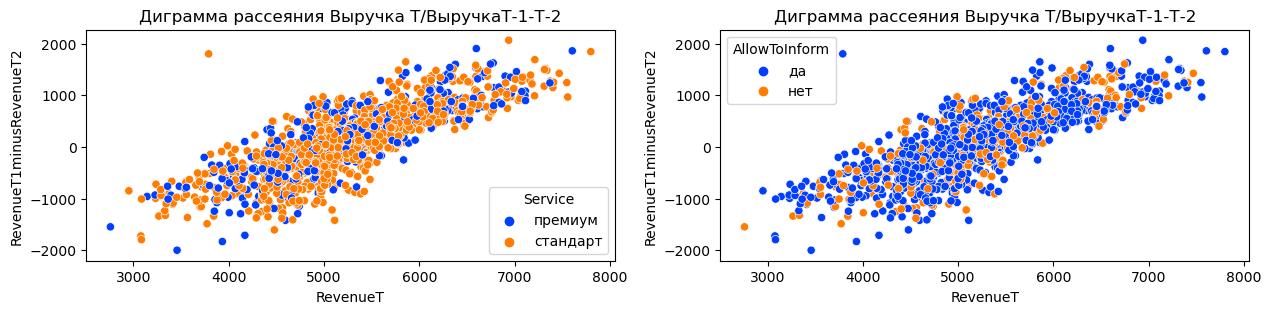

In [82]:
plt.figure(figsize=[15, 3])
plt.subplot(1,2,1)
sns.scatterplot(x = 'RevenueT', y = 'RevenueT1minusRevenueT2', data = df_clients, palette='bright', hue = 'Service')
plt.title('Диграмма рассеяния Выручка Т/ВыручкаТ-1-Т-2')
plt.subplot(1,2,2)
sns.scatterplot(x = 'RevenueT', y = 'RevenueT1minusRevenueT2', data = df_clients, palette='bright', hue = 'AllowToInform')
plt.title('Диграмма рассеяния Выручка Т/ВыручкаТ-1-Т-2')
plt.show()

Если вычесть выручку за предпредыдущий месяц из выручки за предыдущий месяц и посмотреть распределение по сравнению с выручкой за текущий месяц, то видна четкая линейная зависимость выручки и категориального признака Покупательская активность.

Если есть зависимость выручки от месяца к месяцу, то можно спрогнозировать и покупательскую активность.

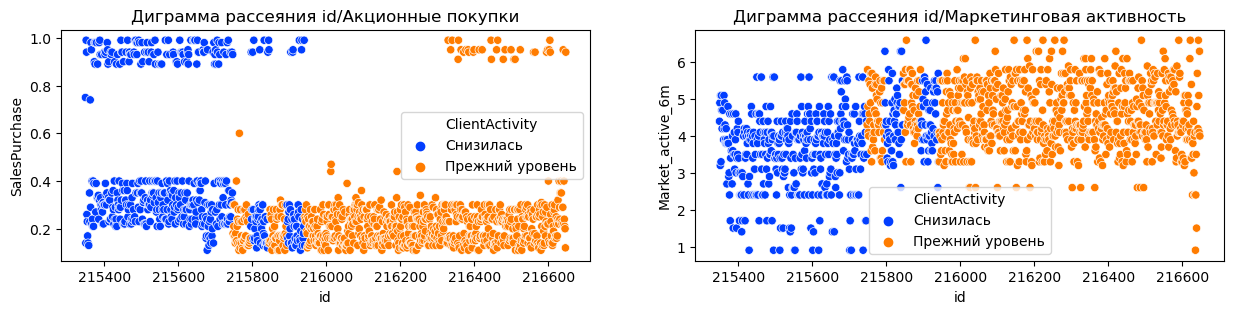

In [83]:
plt.figure(figsize=[15, 3])
plt.subplot(1,2,1)
sns.scatterplot(x = 'id', y = 'SalesPurchase', data = df_clients, palette='bright', hue = 'ClientActivity')
plt.title('Диграмма рассеяния id/Акционные покупки')
plt.subplot(1,2,2)
sns.scatterplot(x = 'id', y = 'Market_active_6m', data = df_clients, palette='bright', hue = 'ClientActivity')
plt.title('Диграмма рассеяния id/Маркетинговая активность')
plt.show()

Удивительно, но факт: Снижается покупательская активность покупателей, у котоых меньше id, они склонны покупать чаще только акционные товары. Возможно, данные по клиентам были изначально разделены на 2 группы: со снижающейсчя активностью и без изменений. Затем данные были слеплены друг под другом.

## Использование пайплайнов


Во время подготовки данных используйте ColumnTransformer. Количественные и категориальные признаки обработайте в пайплайне раздельно. Для кодирования категориальных признаков используйте как минимум два кодировщика, для масштабирования количественных — как минимум два скейлера.

In [84]:
df_clients.sample(5)

,id,ClientActivity,Service,AllowToInform,Market_active_6m,Market_active_cur_month,Duration,SalesPurchase,PopCategory,MeanCategoryVisit,UnpaidGoodsQ,ServiceError,PagesVisit,RevenueT1,RevenueT2,RevenueT,MinutesT1,MinutesT,ClientActivityCode,RevenueT1andRevenueT2,RevenueT1minusRevenueT2
356,215708,Снизилась,премиум,да,3.90,3,570,0.40,Кухонная посуда,3,8,2,3,"6,085.50","4,974.00","6,216.80",10,10,1,"11,059.50","1,111.50"
85,215437,Снизилась,премиум,да,2.40,3,602,0.32,Косметика и аксесуары,2,5,3,3,"4,987.50","4,875.00","4,834.10",10,6,1,"9,862.50",112.50
823,216175,Прежний уровень,стандарт,нет,4.70,3,152,0.21,Домашний текстиль,5,3,7,14,"4,984.00","4,612.00","5,436.40",13,12,0,"9,596.00",372.00
564,215916,Снизилась,премиум,да,4.30,3,881,0.16,Техника для красоты и здоровья,2,2,5,11,"4,708.00","4,714.00","4,832.80",18,12,1,"9,422.00",-6.00
1202,216554,Прежний уровень,премиум,да,5.10,4,893,0.12,Кухонная посуда,2,4,4,9,"6,205.50","5,307.00","7,114.20",17,11,0,"11,512.50",898.50


Исключим из списка признаков лишние:  RevenueT1andRevenueT2 и RevenueT-1minusRevenueT-2.

Также исключаем ClientActivityCode.

In [85]:
df_clients = df_clients.drop(columns = ['ClientActivity', 'RevenueT1andRevenueT2', 'RevenueT1minusRevenueT2'])

In [86]:
num_columns = df_clients.select_dtypes(include='number').columns.tolist()
num_columns

['id',
 'Market_active_6m',
 'Market_active_cur_month',
 'Duration',
 'SalesPurchase',
 'MeanCategoryVisit',
 'UnpaidGoodsQ',
 'ServiceError',
 'PagesVisit',
 'RevenueT1',
 'RevenueT2',
 'RevenueT',
 'MinutesT1',
 'MinutesT',
 'ClientActivityCode']

In [87]:
df_clients.head()

,id,Service,AllowToInform,Market_active_6m,Market_active_cur_month,Duration,SalesPurchase,PopCategory,MeanCategoryVisit,UnpaidGoodsQ,ServiceError,PagesVisit,RevenueT1,RevenueT2,RevenueT,MinutesT1,MinutesT,ClientActivityCode
0,215349,премиум,да,4.40,4,819,0.75,Товары для детей,4,4,2,5,"5,216.00","4,472.00","4,971.60",12,10,1
1,215350,стандарт,нет,4.90,3,539,0.14,Домашний текстиль,5,2,1,5,"5,457.50","4,826.00","5,058.40",8,13,1
2,215351,стандарт,да,3.20,5,896,0.99,Товары для детей,5,0,6,4,"6,158.00","4,793.00","6,610.40",11,13,1
3,215352,стандарт,нет,5.10,3,1064,0.94,Товары для детей,3,2,3,2,"5,807.50","4,594.00","5,872.50",8,11,1
4,215353,стандарт,да,3.30,4,762,0.26,Домашний текстиль,4,1,1,4,"4,738.50","5,124.00","5,388.50",10,10,1


In [88]:
RANDOM_STATE=42
TEST_SIZE=0.25

X_train, X_test, y_train, y_test = train_test_split(
    df_clients.drop(['ClientActivityCode'], axis = 1),
    df_clients['ClientActivityCode'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = df_clients['ClientActivityCode']
)

ohe_columns = [
    'AllowToInform', 
    'PopCategory'
]
ord_columns = [
    'Service'
]
num_columns = ['Market_active_6m', 'Market_active_cur_month', 'Duration', 'SalesPurchase', 'MeanCategoryVisit',\
               'UnpaidGoodsQ', 'ServiceError', 'PagesVisit', 'RevenueT', 'MinutesT1', 'MinutesT', 'RevenueT1', 'RevenueT2']

ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
    )

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум' ],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    #remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [89]:
X_train_p = pd.DataFrame(
    data_preprocessor.fit_transform(X_train),
    columns=data_preprocessor.get_feature_names_out()
)

In [90]:
X_train_p.columns

Index(['ohe__AllowToInform_нет', 'ohe__PopCategory_Косметика и аксесуары',
       'ohe__PopCategory_Кухонная посуда',
       'ohe__PopCategory_Мелкая бытовая техника и электроника',
       'ohe__PopCategory_Техника для красоты и здоровья',
       'ohe__PopCategory_Товары для детей', 'ord__Service',
       'num__Market_active_6m', 'num__Market_active_cur_month',
       'num__Duration', 'num__SalesPurchase', 'num__MeanCategoryVisit',
       'num__UnpaidGoodsQ', 'num__ServiceError', 'num__PagesVisit',
       'num__RevenueT', 'num__MinutesT1', 'num__MinutesT', 'num__RevenueT1',
       'num__RevenueT2'],
      dtype='object')

In [91]:
param_grid = [
     #словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
      # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 3),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            class_weight='balanced',
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
     # словарь для модели SVC()
    {
        'models': [SVC(
            random_state=RANDOM_STATE,
            class_weight='balanced',
            kernel='poly'
        )],
        'models__degree': range(2, 8),
        #'models__C': [0.1,1,10,100],
        #'models__gamma': [0.1,1,10,100],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    #random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели по кросс валидации:', randomized_search.best_score_)

y_test_pred = randomized_search.predict_proba(X_test)[:,1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['AllowToInform',
                                                   'PopCategory']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
            

In [92]:
print(X_train.isnull().any())

id                         False
Service                    False
AllowToInform              False
Market_active_6m           False
Market_active_cur_month    False
Duration                   False
SalesPurchase              False
PopCategory                False
MeanCategoryVisit          False
UnpaidGoodsQ               False
ServiceError               False
PagesVisit                 False
RevenueT1                  False
RevenueT2                  False
RevenueT                   False
MinutesT1                  False
MinutesT                   False
dtype: bool


In [93]:
print(y_train.isnull().any())

False


**Объяснение выбора метрики.**

Для оценки качества модели нужно использовать метрику ROC-AUC, поскольку для целевого признака наблюдается дисбаланс классов. ROC-AUC — это площадь под ROC-кривой, которая показывает зависимость TPR и FPR, поэтому она всегда даёт адекватную оценку качества модели.

При дисбалансе классов лучше не использовать метрику accuracy,т.к. модель всегда предсказывает старший класс. Для accuracy важно только общее количество правильных ответов, поэтому она не обращает внимания на то, что модель плохо предсказывает принадлежность к минорным классам.

F1-мера — это среднее гармоническое precision и recall, поэтому она будет показывать низкое качество модели, если хотя бы одна из его составляющих даёт низкую оценку. F1-мера снижается, когда модель из-за дисбаланса плохо предсказывает минорный класс. 

**Вывод по лучшей модели**

Лучшая модель с гиперпараметрами определена: LogisticRegression.
На тестовой выборке метрика ROC-AUC 0.916 даже выше, чем на кросс валидации 0.896.

## Анализ важности признаков

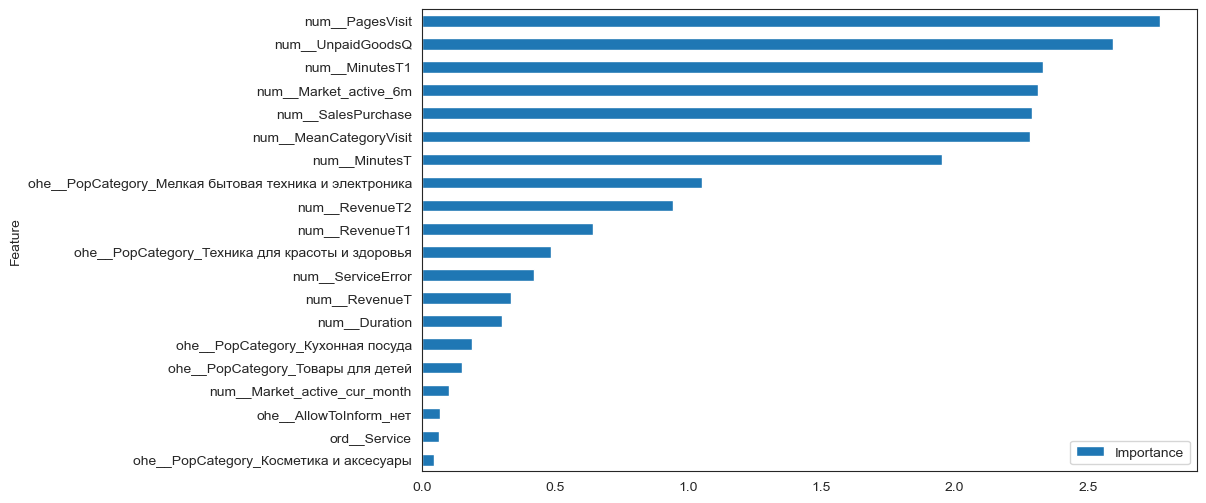

In [94]:
# строим график важности признаков по величине коэффициентов
coefficients = randomized_search.best_estimator_.named_steps['models'].coef_[0]
sns.set_style('white')
feature_importance = pd.DataFrame({'Feature': X_train_p.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6));

In [95]:
feature_importance.sort_values('Importance', ascending=False)

,Feature,Importance
14,num__PagesVisit,2.77
12,num__UnpaidGoodsQ,2.59
16,num__MinutesT1,2.33
7,num__Market_active_6m,2.31
10,num__SalesPurchase,2.29
11,num__MeanCategoryVisit,2.28
17,num__MinutesT,1.95
3,ohe__PopCategory_Мелкая бытовая техника и элек...,1.05
19,num__RevenueT2,0.94
18,num__RevenueT1,0.64


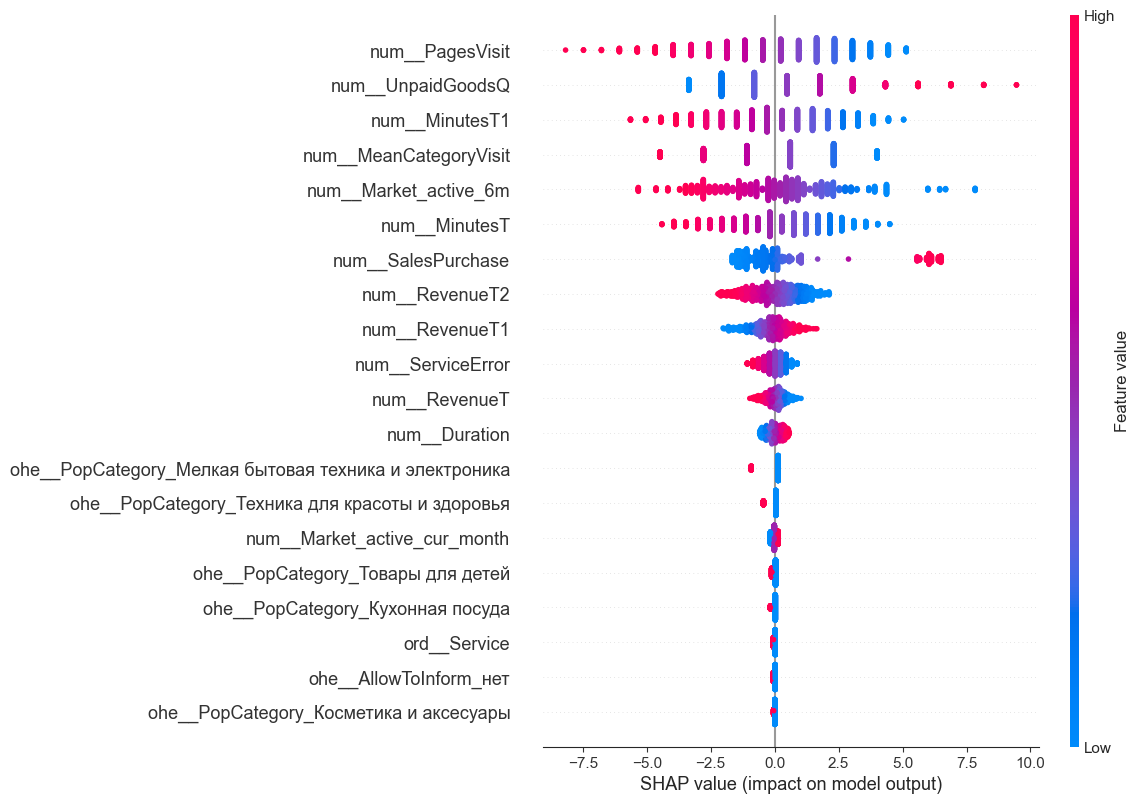

In [96]:
explainer = shap.LinearExplainer(randomized_search.best_estimator_.named_steps['models'], X_train_p)
shap_values = explainer(X_train_p)
shap.plots.beeswarm(shap_values, max_display=25) 

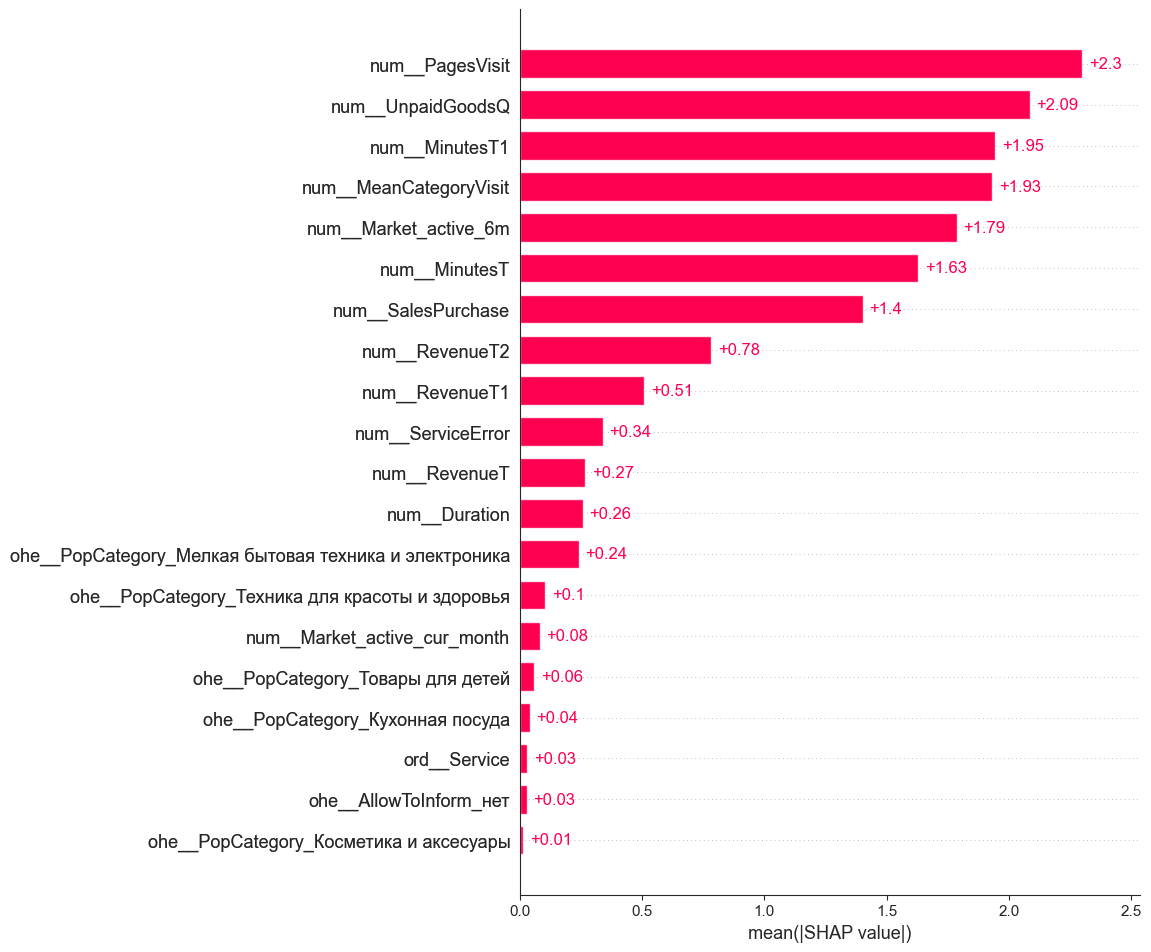

In [97]:
shap.plots.bar(shap_values, max_display=25)

**Выводы по важности признаков**

График важности признаков по логистической регрессии во многом совпадает с графиком shap, но есть небольшие отличия. Рассмотрим признаки детальнее.

Важные признаки:
- на первом месте по важности признаков модели выделен признак Средний_просмотр_категорий_за_визит. Чем меньше просмотров, тем больше шансов отнесения к снижению покуп.активности. Выглядит логичным.
- на втором месте среди важных признаков - Неоплаченные_продукты_штук_квартал. Чем больше неоплаченных продуктов, тем ниже покупательская активность.
- признаки длительности нахождения на сайте, кол-во просмотренных за визит страниц - тоже важны. Логично, что чем меньше эти показатели, тем ближе к "снижению".
- признак Акционные_покупки - 4й по важности по результатам модели и 7й по SHAP. Чем выше доля акционных покупок, тем ближе к "снижению".


Среди признаков, которые мало или почти не оказвают влияния оказались:
- Тип сервиса
- Разрешить сообщать
- Покупки некоторых категорий товаров (кухонная посуда, косметика, товары для детей)
- Странно, но выручка за текущий месяц по важности признаков оказалась на предпоследнем месте. Возможно, произошел рост цен, поэтому это не повлияло на объем выручки клиентов, по которым наблюдается снижение активности. Также показатель активности комбинированный, поэтому в данном случае на его значение повлияли другие факторы. 

Как можно работать с признаками:


Логистическая регрессия улавливает только линейные зависимости, поэтому её можно улучшить, добавив в признаковое описание полиномиальные признаки с помощью полиномизации.
Чтобы отобрать признаки, лучше всего предсказывающие целевой признак, можно использовать SelectKBest.

Понимание значимости признаков дает возможность выявлять сильные зависимости в модели и делать новые бизнес выводы. Можно регулировать значимость, чтобы более внимательно изучить другие признаки или улучшить качество модели.
Можно добавлять новые признаки или избавляться от лишних, изучая важность признаков при каждом изменении, чтобы оптимизировать модель под бизнес цель.

## Шаг 8. Сегментация покупателей

Анализ важности признаков позволяет выделить сегмент покупателей: **Группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности.**

Объединим исходную таблицу с данными о прибыльности клиентов, чтобы посмотреть, сколько прибыли приносит данный сегмент

In [98]:
df_clients = df_clients.merge(income, on='id', how='left')

In [99]:
df_clients.head()

,id,Service,AllowToInform,Market_active_6m,Market_active_cur_month,Duration,SalesPurchase,PopCategory,MeanCategoryVisit,UnpaidGoodsQ,ServiceError,PagesVisit,RevenueT1,RevenueT2,RevenueT,MinutesT1,MinutesT,ClientActivityCode,Income
0,215349,премиум,да,4.40,4,819,0.75,Товары для детей,4,4,2,5,"5,216.00","4,472.00","4,971.60",12,10,1,4.16
1,215350,стандарт,нет,4.90,3,539,0.14,Домашний текстиль,5,2,1,5,"5,457.50","4,826.00","5,058.40",8,13,1,3.13
2,215351,стандарт,да,3.20,5,896,0.99,Товары для детей,5,0,6,4,"6,158.00","4,793.00","6,610.40",11,13,1,4.87
3,215352,стандарт,нет,5.10,3,1064,0.94,Товары для детей,3,2,3,2,"5,807.50","4,594.00","5,872.50",8,11,1,4.21
4,215353,стандарт,да,3.30,4,762,0.26,Домашний текстиль,4,1,1,4,"4,738.50","5,124.00","5,388.50",10,10,1,3.95


Для выделения клиентов в сегмент будем использовать признак Акционные продажи.

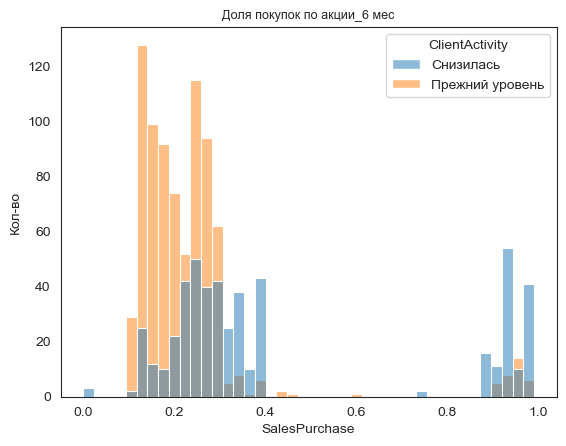

In [100]:
sns.histplot(data=market_clients, x='SalesPurchase', hue='ClientActivity', label = 'ClientActivity')
plt.ylabel('Кол-во')
plt.title('Доля покупок по акции_6 мес', fontsize=9)
plt.show()

Возьмем порог для деления по сегментам на уровне 0.75. Покупатели со значением показателя Акционные продажи более 0.75 отнесем к новому сегменту. Зададим значения для сегмента: наши/чужие

In [101]:
df_clients['Segment'] = df_clients['SalesPurchase'].apply(lambda x: 'наши'  if x > 0.75 else 'чужие')

In [102]:
df_clients.sample(5)

,id,Service,AllowToInform,Market_active_6m,Market_active_cur_month,Duration,SalesPurchase,PopCategory,MeanCategoryVisit,UnpaidGoodsQ,ServiceError,PagesVisit,RevenueT1,RevenueT2,RevenueT,MinutesT1,MinutesT,ClientActivityCode,Income,Segment
546,215898,стандарт,да,5.50,4,703,0.14,Мелкая бытовая техника и электроника,2,1,3,7,"3,428.00","4,346.00","4,353.60",18,11,1,3.10,чужие
393,215745,стандарт,да,1.70,4,550,0.94,Мелкая бытовая техника и электроника,4,1,3,6,"5,654.50","4,990.00","6,126.40",9,9,1,5.10,наши
590,215942,премиум,да,4.10,4,575,0.25,Техника для красоты и здоровья,5,3,5,13,"4,139.00","4,629.00","3,843.90",15,19,0,3.50,чужие
801,216153,стандарт,нет,4.80,5,495,0.14,Косметика и аксесуары,4,3,3,8,"5,365.00","5,533.00","5,349.40",12,17,0,3.21,чужие
310,215662,стандарт,да,2.90,3,441,0.39,Товары для детей,2,0,1,7,"5,197.50","4,722.00","5,908.60",7,9,1,3.98,чужие


In [103]:
df_clients['RevenueTotal'] = df_clients['RevenueT'] + df_clients['RevenueT1'] + df_clients['RevenueT2']
df_clients['MinutesTotal'] = df_clients['MinutesT'] + df_clients['MinutesT1']

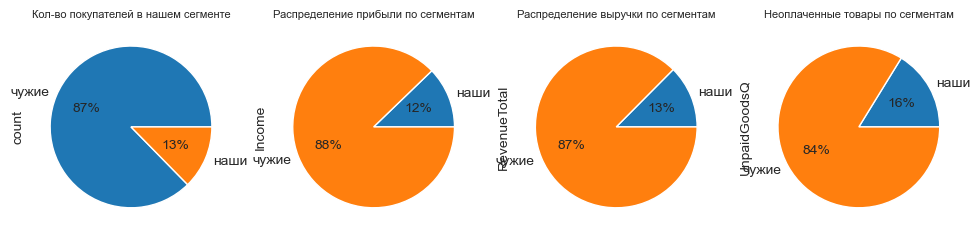

In [104]:
plt.figure(figsize=[12, 3])
plt.subplot(1,4,1)
df_clients['Segment'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Кол-во покупателей в нашем сегменте', fontsize= 8)
plt.subplot(1,4,2)
df_clients.groupby(['Segment'])['Income'].sum().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Распределение прибыли по сегментам', fontsize= 8)
plt.subplot(1,4,3)
df_clients.groupby(['Segment'])['RevenueTotal'].sum().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Распределение выручки по сегментам', fontsize= 8)
plt.subplot(1,4,4)
df_clients.groupby(['Segment'])['UnpaidGoodsQ'].sum().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Неоплаченные товары по сегментам', fontsize= 8 )
plt.show()

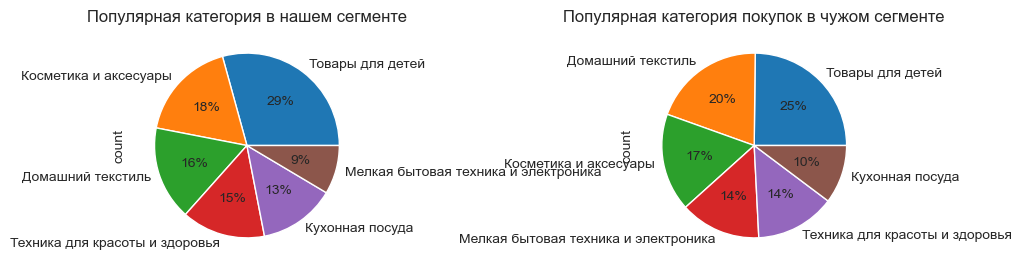

In [105]:
plt.figure(figsize=[12, 3])
plt.subplot(1,2,1)
df_clients[df_clients['Segment'] == 'наши']['PopCategory'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Популярная категория в нашем сегменте')
plt.subplot(1,2,2)
df_clients[df_clients['Segment'] == 'чужие']['PopCategory'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Популярная категория покупок в чужом сегменте')
plt.show()

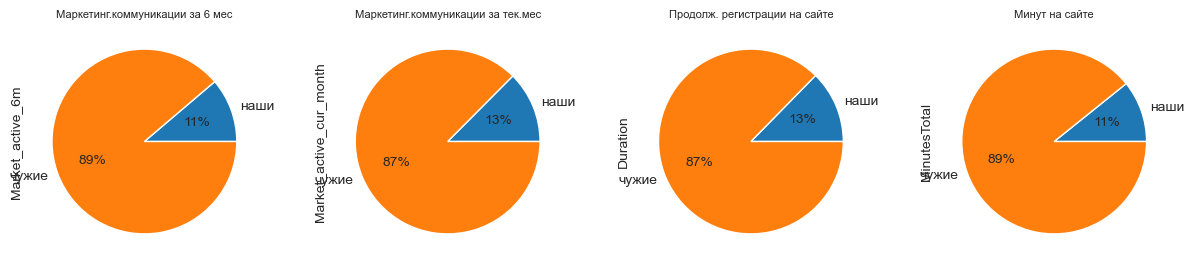

In [106]:
plt.figure(figsize=[15, 3])
plt.subplot(1,4,1)
df_clients.groupby(['Segment'])['Market_active_6m'].sum().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Маркетинг.коммуникации за 6 мес', fontsize= 8)
plt.subplot(1,4,2)
df_clients.groupby(['Segment'])['Market_active_cur_month'].sum().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Маркетинг.коммуникации за тек.мес', fontsize= 8)
plt.subplot(1,4,3)
df_clients.groupby(['Segment'])['Duration'].sum().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Продолж. регистрации на сайте', fontsize= 8 )
plt.subplot(1,4,4)
df_clients.groupby(['Segment'])['MinutesTotal'].sum().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Минут на сайте', fontsize= 8 )
plt.show()

**Выводу по выбранному сегменту: Группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности.**


*Анализ сегмента.*


Доля клиентов сегмента составляет 13%.  Посмотрим, насколько отличаются другие показатели от этого значения:


- доля прибыли компании от выделенного сегмента составляет 12%, т.е. прибыль в этом сегменте немного проседает из-за особенностей сегмента - клиенты покупают товары за низкую цену;
- доля выручки компании от выделенного сегмента - 13%, т.е. по объему покупки данного сегмента такие же как и у остальных покупателей;
- сильно выделяется кол-во неоплаченных товаров в корзине - 16%. Это можно использовать.
- данный сегмент покупает больше товаров в категории: товары для детей. Это также можно использовать.
- продолжительность нахождения на сайте меньше (11%), чем у остальных пользователей. Значит,клиенты не проводят много времени на сайте, если нет акций. Эту приверженность также можно использовать.
- маркетинговые коммуникации за 6 мес.ниже по сравнению с другими покупателями. Тут есть над чем работать, т.е. для данного сегмента используется не тот канал рекламы, который действует на них эффективно.


*Предложения для увеличения продаж в сегменте:*

1. Посмотреть какая категория товаров остается в корзине данного сегмента. Можно предлагать эту категорию для покупки по акции, если клиент покупает Детские товары. Клиент любит покупки по акции, но ему нужны детские товары.
2. Если действует период скидок на детские товары, то вместе с ними предлагать к покупке товары из корзины покупателя товары других категорий. Сэкономив на одном, клиент, возможно, захочет купить еще что-то из того, что давно хотел.
3. Проанализировать канал маркетинговых коммуникаций. Для того, чтобы стимулировать клиента подольше находиться на сайте, ему можно давать инфо не только по текущим акциям, но и по предстоящим. Можно предложить рассылку акций по товарам, которые находятся в его корзине.
4. Можно предлагать акционные цены на спец.случаи клиента, например, день рождения детей.    

## Шаг 9. Общий вывод

**Выводы по проекту:**

Описание задачи. Для интернет магазина нужно разработать персональные предложения для клиентов, которые повысят их покупательскую активность.

В качестве исходных данных использовались данные магазина, где уровень покупательской способности был заранее промаркирован значениями: прежняя или снизилась. Также были предоставлены доп.данные по прибыли и времени нахождения на сайте. Данные были обработаны и исследованы. Избавились от выбросов в выручке и отобрали клиентов, которые делали покупки в теч.3х месяцев.

Для поиска лучшей модели использовала пайплайн с подбором гипперпараметров для моделей:  KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC().
Лучшая модель оказалась LogisticRegression.

В качестве сегмента для более детального изучения была взята группа покупателей: Группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности.

Для формирования предложения по выделению сегмента покупателей использовались данные модели по важности признаков, а также определялась важность признаков по графику shap.

Были проведены доп.исследования по сравнению поведения покупателей в выбранном сегменте по сравнению с остальными пользователями.По итогам исследования были сформированы предложения для увеличения покупательской активности клиентов сегмента.

Не буду дублировать предложения - они чуть выше.




    